## Install packages

In [ ]:
!pip install ultralytics

## Mounting to Google Drive

In [ ]:
import os
from google.colab import drive

# Define the base path for your Google Drive.
base_path = '/content/drive'

# Define the specific folder path within your Google Drive.
folder_path = 'MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project'

# Combine the base path and folder path to create the full mount path.
full_project_path = os.path.join(base_path, folder_path)

# Mount your drive.
drive.mount(base_path, force_remount=True)

Mounted at /content/drive


## Defining the path to the .yaml-file.

In [ ]:
# Which dataset would you like to train on?
set_nr = "01"
dataset_root = os.path.join(full_project_path, "preprocessed_dataset", set_nr)

data_yaml = os.path.join(dataset_root, set_nr + ".yaml")

## Making sure that we have access to 'cuda' GPU

In [ ]:
import torch
print(torch.cuda.is_available())  # Should be True
print(torch.cuda.get_device_name(0))  # Should show a GPU name

True
Tesla T4


## Training

In [ ]:
from ultralytics import YOLO
import shutil

def modelSetup():
  # Set device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(f"Using device: {device}")
  # Initialize model
  model = YOLO('yolo11n.pt')  # Load pretrained model.
  model.to(device)  # Move to device.
  return model, device

def train_model(data_yaml, model, device, epochs=3):
  # Define training parameters and enable validation.
  results = model.train(data=data_yaml,
                       epochs=epochs,
                       val=True,
                       device=device,
                       pretrained=True)
                       # One can add more parameters here.
  return  results, model


if __name__ == "__main__":
  # Fetching the pretrained model and the device.
  model, device = modelSetup()

  # Training.
  print("------Starting training------")
  results, trained_model = train_model(data_yaml, model, device, epochs=3)
  print("------Finished training------")

  # Define the save directory within your Google Drive
  #save_dir = "/content/runs/models"  # Or your preferred location
  #os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

  # Save the model.
  #save_path = os.path.join(save_dir, "trained_model.pt")
  #best_model = trained_model.ckpt_path
  #shutil.copy(best_model, save_path)
  #print(f"Model saved to: {save_path}")

## Assessing the model

Using device: cuda
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 6.0±12.4 ms, read: 152.0±90.9 MB/s, size: 504.5 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/labels/val.cache... 248 images, 0 backgrounds, 0 corrupt: 100%|██████████| 248/248 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]


                   all        248        248          1          1      0.995      0.895
Speed: 2.4ms preprocess, 4.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val2
mAP@0.5: 0.9950
Precision: 0.9998
Recall: 1.0000

image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0010.png: 480x640 1 ape, 9.4ms
Speed: 1.4ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


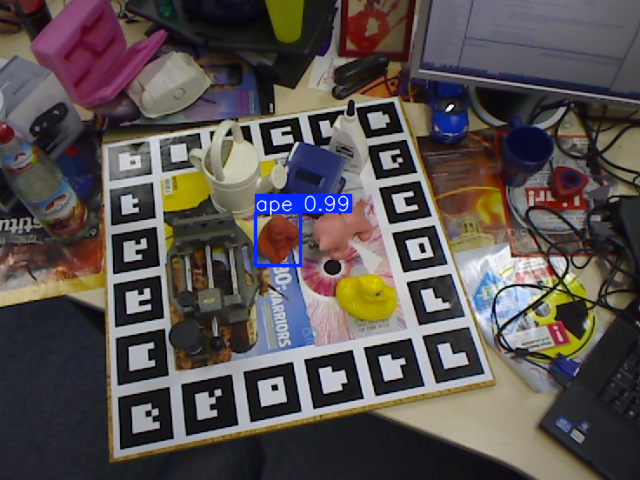


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0023.png: 480x640 1 ape, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


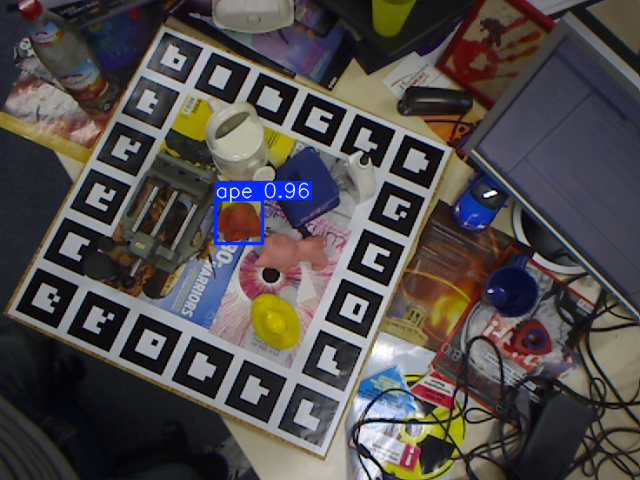


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0031.png: 480x640 1 ape, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


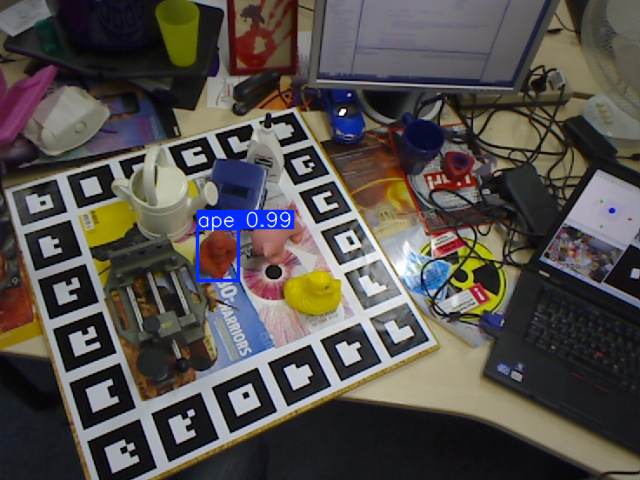


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0043.png: 480x640 1 ape, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


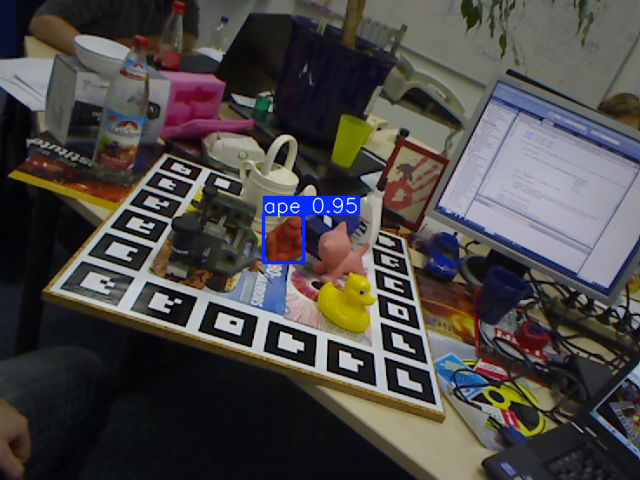


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0044.png: 480x640 1 ape, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


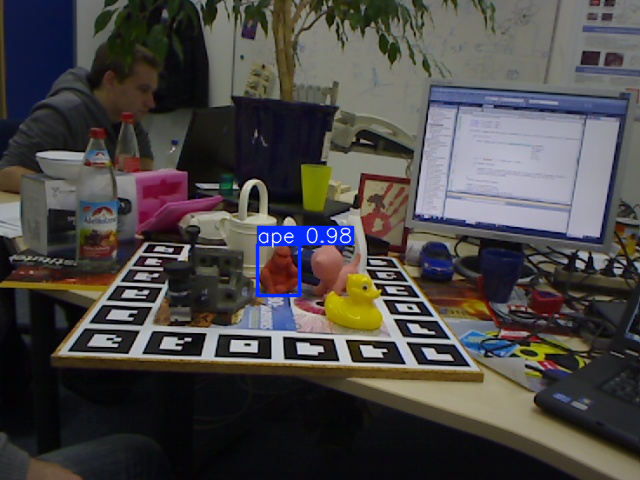


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0049.png: 480x640 1 ape, 16.6ms
Speed: 2.1ms preprocess, 16.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


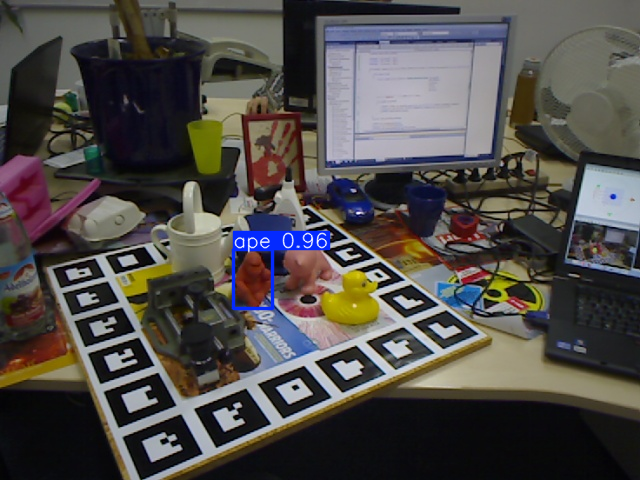


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0051.png: 480x640 1 ape, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


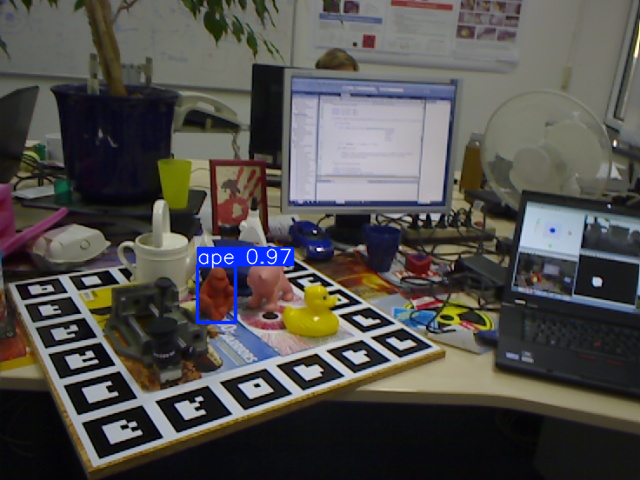


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0054.png: 480x640 1 ape, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


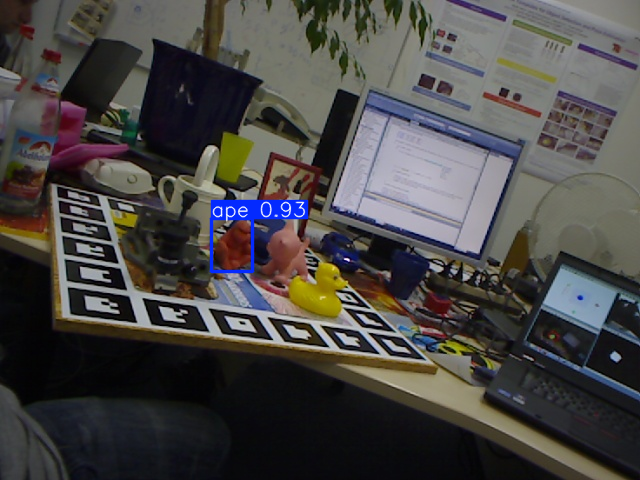


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0056.png: 480x640 1 ape, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


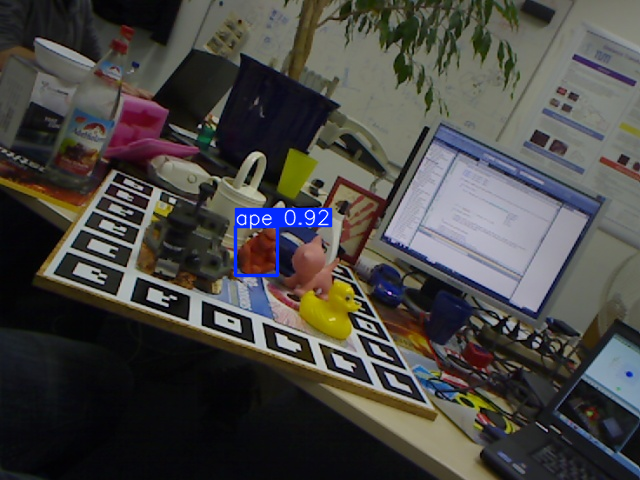


image 1/1 /content/drive/MyDrive/Colab Notebooks/Machine Learning and Deep Learning/Project/preprocessed_dataset/01/images/val/0058.png: 480x640 1 ape, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


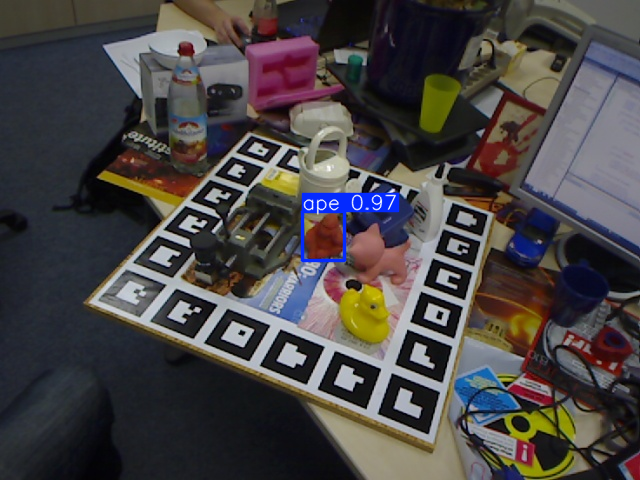

In [ ]:
import glob

# Load the model.
#model_path = "/content/runs/models/trained_model.pt"
#model = YOLO(model_path)
model_folder = "train"
base_path = "/content/runs/detect"
model_path = os.path.join(base_path, model_folder, "weights", "best.pt")
model = YOLO(model_path)

# Define device.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Evaluate the model.
metrics = model.val(device=device, save_dir=None)

# Access metrics.
mAP50 = metrics.box.map50
precision = metrics.box.p
recall = metrics.box.r

print(f"mAP@0.5: {mAP50:.4f}")
print(f"Precision: {precision[0]:.4f}")
print(f"Recall: {recall[0]:.4f}")

# Visualize predictions on a few validation images.
def get_first_n_files(folder_path, n=1, extension="*"):
    file_paths = glob.glob(os.path.join(folder_path, extension))
    return file_paths[:n]

path = dataset_root + "/images/val"
n_files = get_first_n_files(path, n=10)

for i in range(len(n_files)):
    result = model(n_files[i], save=False)
    result[0].show()